In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from sklearn import metrics 

In [229]:
dataset = pd.read_csv('C:\\Users\\Eric\\Desktop\\4105\\HW2\\diabetes.csv')
x = dataset.values[:,6]
y = dataset.values[:,8]

In [230]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state=0)

xTrain = xTrain.reshape(-1,1)
xTest = xTest.reshape(-1,1)

xTrainSc = StandardScaler()
xTrain = xTrainSc.fit_transform(xTrain)
xTest = xTrainSc.fit_transform(xTest)

classifier = LogisticRegression(random_state=0)
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

In [231]:
yPredic = classifier.predict(xTest) 
cnf_matrix = confusion_matrix(yTest, yPredic) 

In [232]:
print("Accuracy:",metrics.accuracy_score(yTest, yPredic)) 
print("Precision:",metrics.precision_score(yTest, yPredic)) 
print("Recall:",metrics.recall_score(yTest, yPredic)) 

Accuracy: 0.6883116883116883
Precision: 0.45454545454545453
Recall: 0.10638297872340426


Text(0.5, 257.44, 'Predicted label')

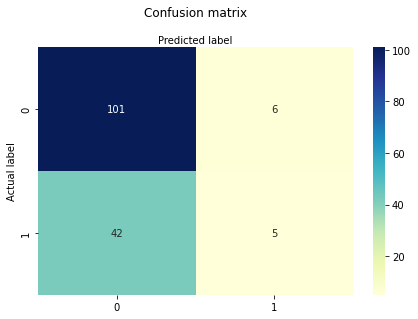

In [233]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 